# Assignment-7-KMeans Clustering (Crime)

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:\
Murder -- Muder rates in different places of United States\
Assualt- Assualt rate in different places of United States\
UrbanPop - urban population in different places of United States\
Rape - Rape rate in different places of United States


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
# Import Dataset
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
# crime=crime.drop([''],axis=1)
crime=crime.rename({'Unnamed: 0':'State'}, axis=1)
crime

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# Normalize heterogenous numerical data
crime_norm=pd.DataFrame(normalize(crime.iloc[:,1:]),columns=['Murder','Assault','UrbanPop','Rape'])
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


# Hierarchical Clustering

In [6]:
# Import Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

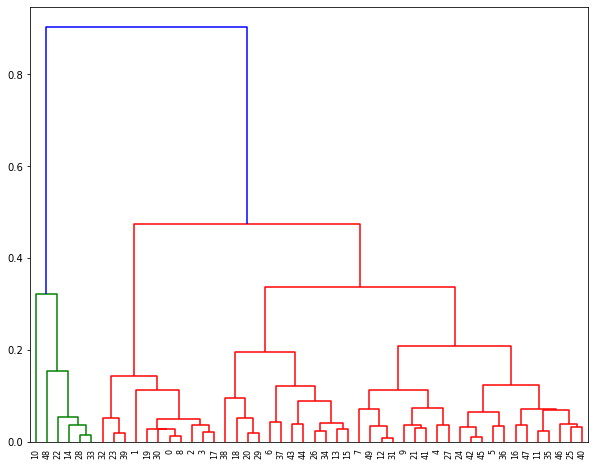

In [7]:
# As we already have normalized data, create Dendrograms
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(crime_norm,'complete'))

In [8]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [9]:
y=pd.DataFrame(hclusters.fit_predict(crime_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    20
3    12
1    12
0     6
Name: clustersid, dtype: int64

In [10]:
# Assign clusters to the data set
crime2=crime.copy()
crime2['clustersid']=hclusters.labels_
crime2

,State,Murder,Assault,UrbanPop,Rape,clustersid
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,2


In [11]:
crime2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,2.616667,54.833333,62.000000,12.333333
1,1,4.758333,116.583333,70.083333,15.683333
2,2,11.760000,255.550000,66.100000,27.090000
3,3,6.783333,141.583333,61.833333,21.466667


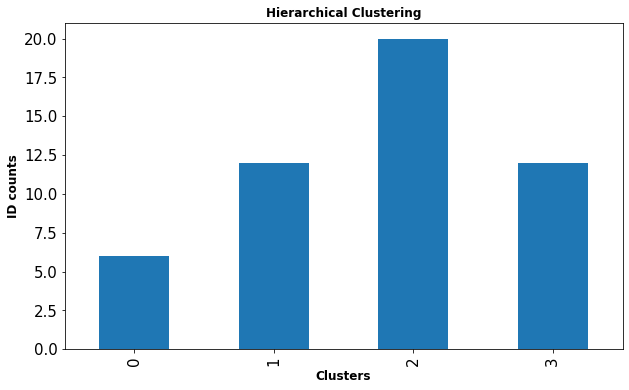

In [12]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
crime2.groupby(['clustersid']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()



# Kmeans Clustering

In [13]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [14]:
# within-cluster sum-of-squares criterion 
wcss=[]
ks = range (1,11)
for k in ks:
    #create kmeans instance with k clusters
    kmeans_model=KMeans(n_clusters=k,random_state=2)
    #Fit model to samples
    kmeans_model.fit(crime_norm)
    #Append Inerta to list
    wcss.append(kmeans_model.inertia_)

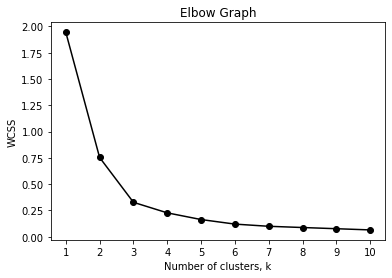

In [15]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(ks,wcss, '-o', color='black')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters, k')
plt.ylabel('WCSS')
plt.xticks(ks)
plt.show()

## Build Cluster algorithm using K=4

In [16]:
# Cluster algorithm using K=4
clusters3=KMeans(4,random_state=30).fit(crime_norm)
clusters3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [17]:
clusters3.labels_

array([2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 1, 0, 2, 3, 1, 3, 0, 2, 3, 2, 3, 2,
       1, 2, 0, 0, 3, 2, 1, 3, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 3,
       3, 0, 0, 0, 1, 0], dtype=int32)

In [18]:
# Assign clusters to the data set
crime3=crime.copy()
crime3['clustersid']=clusters3.labels_
crime3

,State,Murder,Assault,UrbanPop,Rape,clustersid
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,2


In [19]:
# Compute the centroids for K=4 clusters
clusters3.cluster_centers_

array([[0.04205536, 0.90426714, 0.40250352, 0.12472689],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.03689098, 0.84108145, 0.52207436, 0.12738443]])

In [20]:
# Group data by Clusters (K=4)
crime3.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.542857,145.285714,63.500000,20.107143
1,1,2.616667,54.833333,62.000000,12.333333
2,2,12.021053,260.526316,66.421053,27.694737
3,3,4.881818,111.363636,68.545455,16.354545


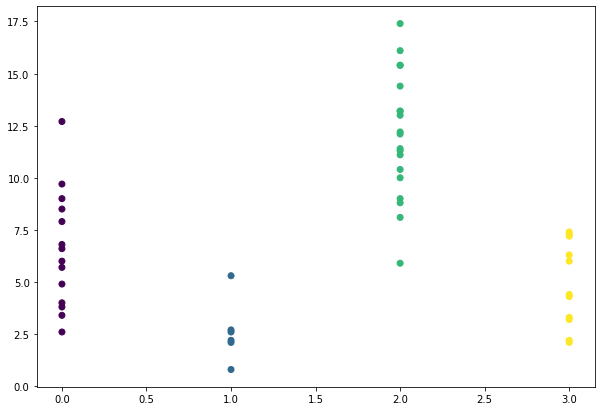

In [21]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['clustersid'],crime3['Murder'], c=clusters3.labels_) 

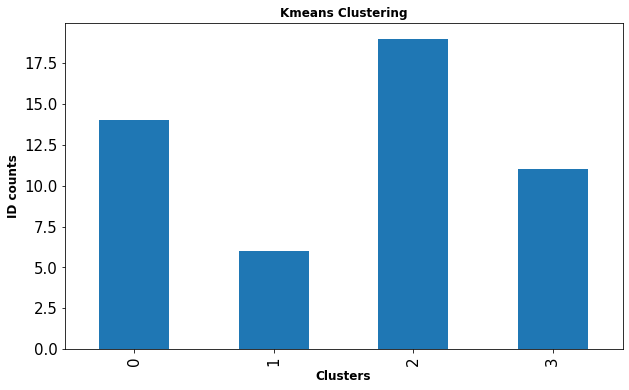

In [22]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
crime3.groupby(['clustersid']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## Build Cluster algorithm using K=5

In [23]:
# Cluster algorithm using K=5
clusters4=KMeans(5,random_state=30).fit(crime_norm)
clusters4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [24]:
clusters4.labels_

array([2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 4, 0, 2, 3, 1, 3, 0, 2, 3, 2, 3, 2,
       1, 2, 0, 0, 3, 2, 1, 3, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 3,
       3, 0, 0, 0, 1, 0], dtype=int32)

In [25]:
# Assign clusters to the data set
crime4=crime.copy()
crime4['clustersid']=clusters4.labels_
crime4

,State,Murder,Assault,UrbanPop,Rape,clustersid
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,2


In [26]:
# Compute the centroids for K=5 clusters
clusters4.cluster_centers_

array([[0.04205536, 0.90426714, 0.40250352, 0.12472689],
       [0.0247473 , 0.69224362, 0.70739404, 0.13009016],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277]])

In [27]:

# Group data by Clusters (K=5)
crime4.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.542857,145.285714,63.500000,20.107143
1,1,2.080000,56.600000,57.800000,10.760000
2,2,12.021053,260.526316,66.421053,27.694737
3,3,4.881818,111.363636,68.545455,16.354545
4,4,5.300000,46.000000,83.000000,20.200000


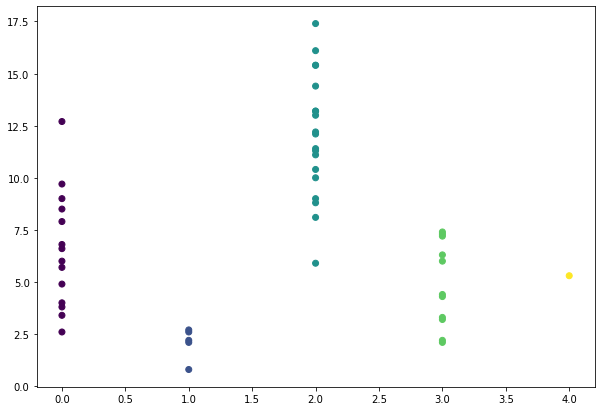

In [28]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime4['clustersid'],crime4['Murder'], c=clusters4.labels_) 

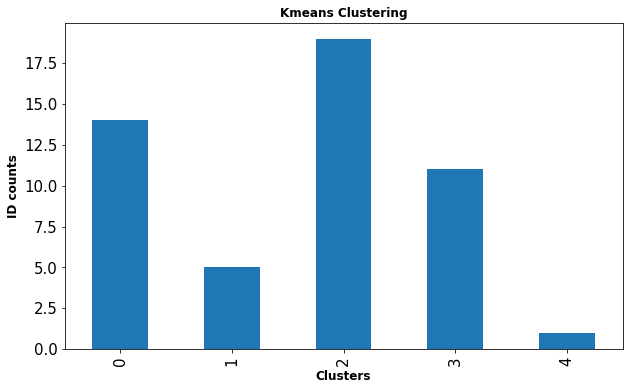

In [29]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
crime4.groupby(['clustersid']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [31]:
crime_norm = StandardScaler().fit_transform(crime.iloc[:,1:])

In [32]:
#for epsilon = 1
dbscan = DBSCAN(eps=1, min_samples=11).fit(crime_norm)

In [33]:
#Noisy samples are given the label -1.
labels = dbscan.labels_

In [34]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(labels)
unique_labels = set(labels)
print(unique_labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0  0 -1 -1 -1 -1 -1 -1  0 -1
 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0]
{0, -1}


In [35]:
cl = pd.DataFrame(dbscan.fit_predict(crime_norm),columns=['cluster'])
cl['cluster'].value_counts()

-1    39
 0    11
Name: cluster, dtype: int64

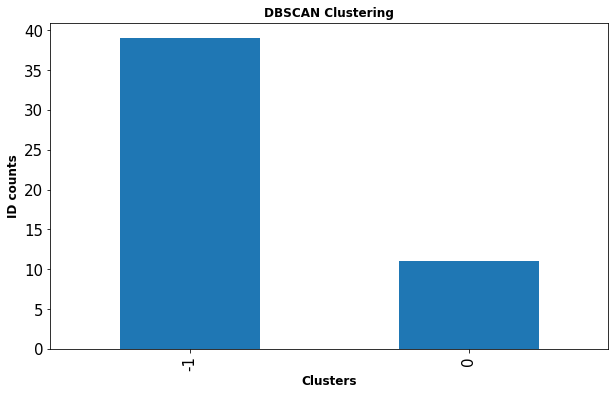

In [36]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
cl.groupby(['cluster']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [37]:
# Assign clusters to the data set
crime5=crime.copy()
crime5['cluster']=labels
crime5.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,8.617949,189.230769,66.358974,22.769231
1,0,4.845455,105.272727,62.636364,15.781818


In [38]:
#for epsilon = 0.8
dbscan = DBSCAN(eps=0.8, min_samples=11).fit(crime_norm)

In [39]:
#Noisy samples are given the label -1.
labels = dbscan.labels_

In [40]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(labels)
unique_labels = set(labels)
print(unique_labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
{-1}


In [41]:
cl = pd.DataFrame(dbscan.fit_predict(crime_norm),columns=['cluster'])
cl['cluster'].value_counts()

-1    50
Name: cluster, dtype: int64

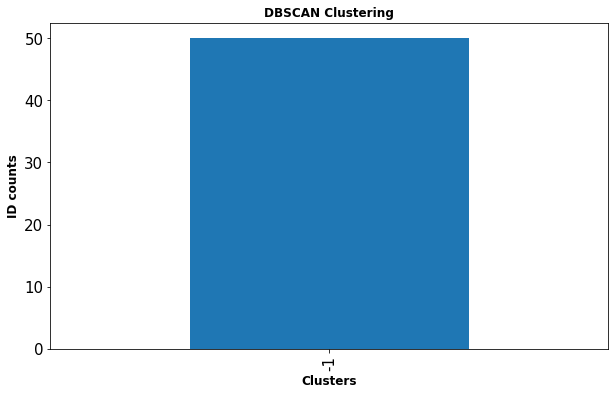

In [42]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
cl.groupby(['cluster']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [43]:
# Assign clusters to the data set
crime6=crime.copy()
crime6['cluster']=labels
crime6.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,7.788,170.76,65.54,21.232
